In [1]:
!wget https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0

--2023-04-22 03:26:19--  https://www.dropbox.com/s/nilt43hyl1dx82k/dataset.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/nilt43hyl1dx82k/dataset.zip [following]
--2023-04-22 03:26:20--  https://www.dropbox.com/s/raw/nilt43hyl1dx82k/dataset.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf805edd4e1d46db18a0f53b83e.dl.dropboxusercontent.com/cd/0/inline/B6qh96V_geesklYpGJU_UbIgB-5jBJo2712EJV7OXK1PuOGRf924_VVnO61rrcG4udhfsvRcWX1bJoyhlNQhLqpbNeLmv9A1gmpyMIXph0rosiED5yqpcYG09oF_PM8RQLjTZzf9PYQN-DHsLAx9I4RC9KMnJWHHN5hJVyOIPHNuWw/file# [following]
--2023-04-22 03:26:20--  https://ucf805edd4e1d46db18a0f53b83e.dl.dropboxusercontent.com/cd/0/inline/B6qh96V_geesklYpGJU_UbIgB-5jBJo2712EJV7OXK1PuOGRf924_VVnO61rrcG4udhfsvRcWX1bJo

In [2]:
!unzip dataset.zip?dl=0


Streaming output truncated to the last 5000 lines.
  inflating: train/sad/Training_65242339.jpg  
  inflating: train/sad/Training_65267116.jpg  
  inflating: train/sad/Training_65275626.jpg  
  inflating: train/sad/Training_6529266.jpg  
  inflating: train/sad/Training_65329617.jpg  
  inflating: train/sad/Training_65338712.jpg  
  inflating: train/sad/Training_65338797.jpg  
  inflating: train/sad/Training_65387162.jpg  
  inflating: train/sad/Training_65404494.jpg  
  inflating: train/sad/Training_65426218.jpg  
  inflating: train/sad/Training_65430136.jpg  
  inflating: train/sad/Training_65437377.jpg  
  inflating: train/sad/Training_6545735.jpg  
  inflating: train/sad/Training_65463385.jpg  
  inflating: train/sad/Training_65473985.jpg  
  inflating: train/sad/Training_65502829.jpg  
  inflating: train/sad/Training_65505359.jpg  
  inflating: train/sad/Training_65508578.jpg  
  inflating: train/sad/Training_65516023.jpg  
  inflating: train/sad/Training_65524027.jpg  
  inflating

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from keras.layers import Flatten, Dense
from keras.models import Model
from tensorflow.keras.utils import img_to_array
from keras.applications.mobilenet import MobileNet, preprocess_input 
from keras.losses import categorical_crossentropy

In [4]:
# Working with pre trained model 

base_model = MobileNet( input_shape=(224,224,3), include_top= False )

for layer in base_model.layers:
  layer.trainable = False


x = Flatten()(base_model.output)
x = Dense(units=7 , activation='softmax' )(x)

# creating our model.
model = Model(base_model.input, x)

17225924/17225924 [==============================] - 0s 0us/step


In [5]:
model.compile(optimizer='adam', loss= categorical_crossentropy , metrics=['accuracy']  )


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array

train_datagen = ImageDataGenerator(
     zoom_range = 0.2, 
     shear_range = 0.2, 
     horizontal_flip=True, 
     rescale = 1./255
)

train_data = train_datagen.flow_from_directory(directory= "/content/train", 
                                               target_size=(224,224), 
                                               batch_size=32,
                                  )


train_data.class_indices


Found 28709 images belonging to 7 classes.


{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [7]:
val_datagen = ImageDataGenerator(rescale = 1./255 )

val_data = val_datagen.flow_from_directory(directory= "/content/test", 
                                           target_size=(224,224), 
                                           batch_size=32,
                                  )
     

Found 7178 images belonging to 7 classes.


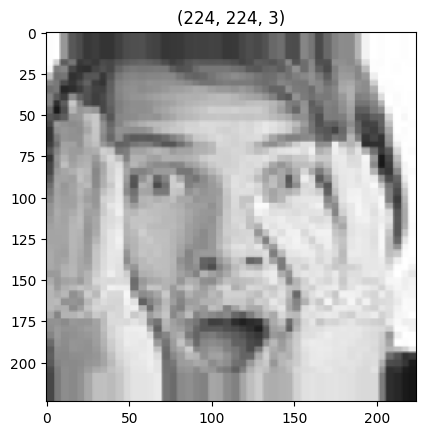

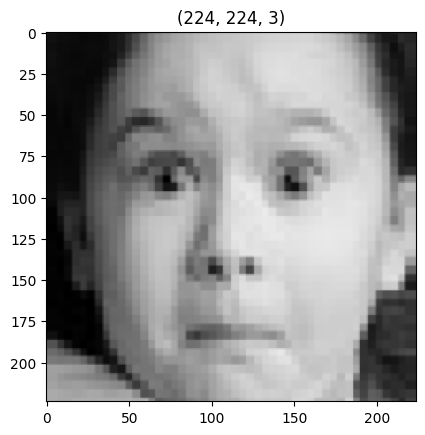

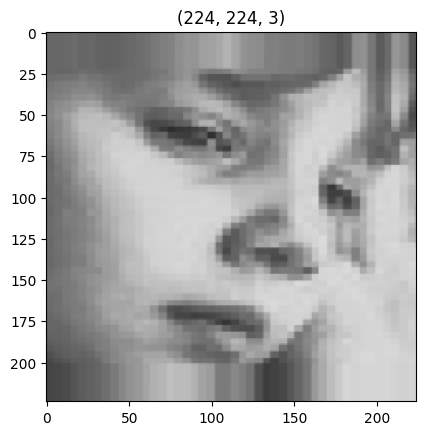

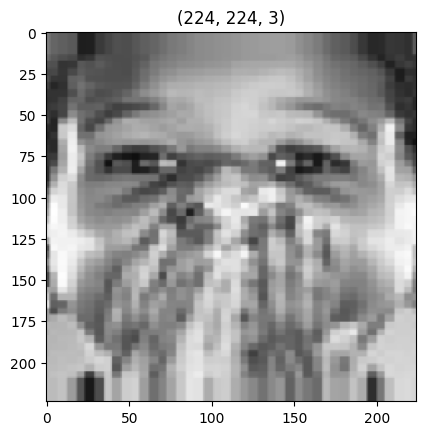

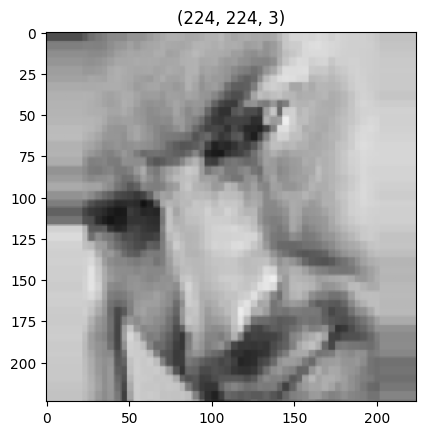

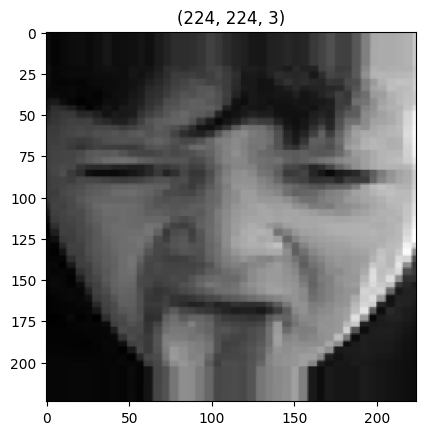

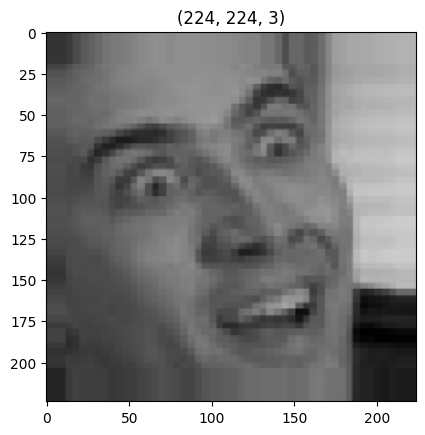

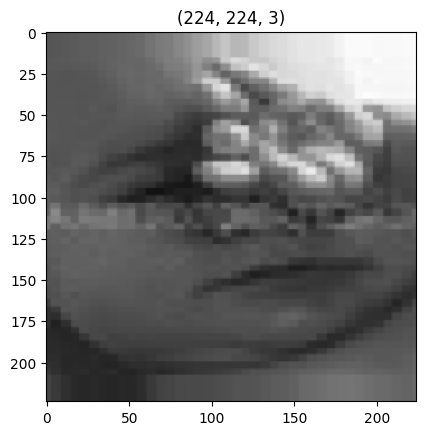

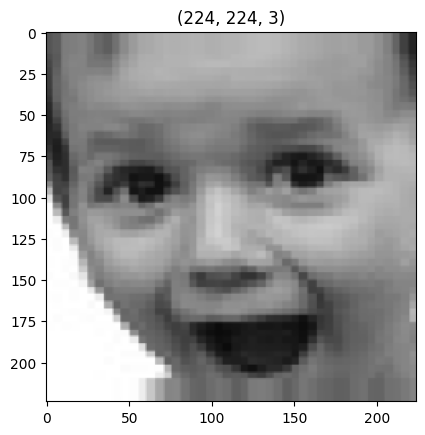

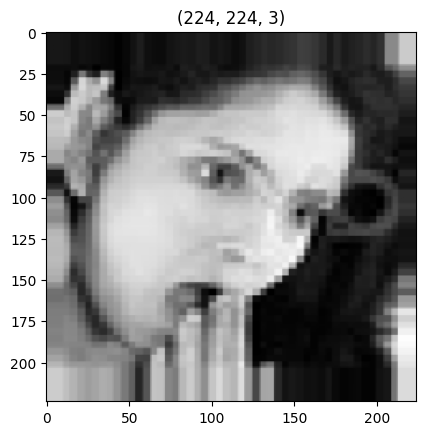

In [33]:
# to visualize the images in the traing data denerator 

t_img , label = train_data.next()

#-----------------------------------------------------------------------------
# function when called will prot the images 
def plotImages(img_arr, label):
  """
  input  :- images array 
  output :- plots the images 
  """
  count = 0
  for im, l in zip(img_arr,label) :
    plt.imshow(im)
    plt.title(im.shape)
    plt.axis = False
    plt.show()
    
    count += 1
    if count == 10:
      break

#-----------------------------------------------------------------------------
# function call to plot the images 
plotImages(t_img, label)

In [34]:
## having early stopping and model check point 

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping
es = EarlyStopping(monitor='val_accuracy', min_delta= 0.01 , patience= 10, verbose= 1, mode='auto')

# model check point
mc = ModelCheckpoint(filepath="best_model.h5", monitor= 'val_accuracy', verbose= 1, save_best_only= True, mode = 'auto')

# puting call back in a list 
call_back = [es, mc]

In [35]:
hist = model.fit_generator(train_data, 
                           steps_per_epoch= 10, 
                           epochs= 30, 
                           validation_data= val_data, 
                           validation_steps= 8, 
                           callbacks=[es,mc])

<ipython-input-35-f681b3c69731>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(train_data,


Epoch 1/30
10/10 [==============================] - ETA: 0s - loss: 5.7531 - accuracy: 0.4906
Epoch 1: val_accuracy improved from -inf to 0.43750, saving model to best_model.h5
10/10 [==============================] - 40s 4s/step - loss: 5.7531 - accuracy: 0.4906 - val_loss: 7.0206 - val_accuracy: 0.4375
Epoch 2/30
10/10 [==============================] - ETA: 0s - loss: 5.5671 - accuracy: 0.4563
Epoch 2: val_accuracy did not improve from 0.43750
10/10 [==============================] - 37s 4s/step - loss: 5.5671 - accuracy: 0.4563 - val_loss: 7.0052 - val_accuracy: 0.4258
Epoch 3/30
10/10 [==============================] - ETA: 0s - loss: 6.5302 - accuracy: 0.4750
Epoch 3: val_accuracy did not improve from 0.43750
10/10 [==============================] - 37s 4s/step - loss: 6.5302 - accuracy: 0.4750 - val_loss: 6.2545 - val_accuracy: 0.4102
Epoch 4/30
10/10 [==============================] - ETA: 0s - loss: 5.4936 - accuracy: 0.4688
Epoch 4: val_accuracy improved from 0.43750 to 0.488

In [36]:
# Loading the best fit model 
from keras.models import load_model
model = load_model("/content/best_model.h5")


In [37]:
h =  hist.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

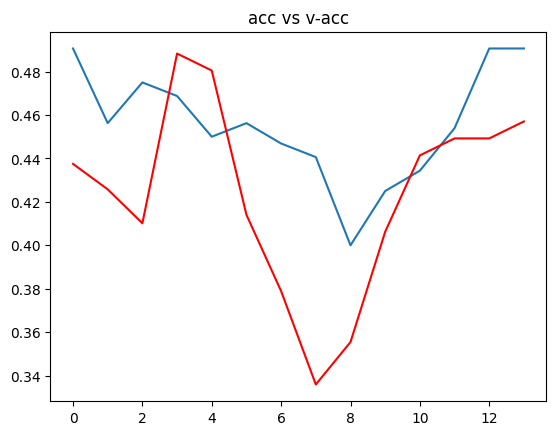

In [38]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'] , c = "red")
plt.title("acc vs v-acc")
plt.show()

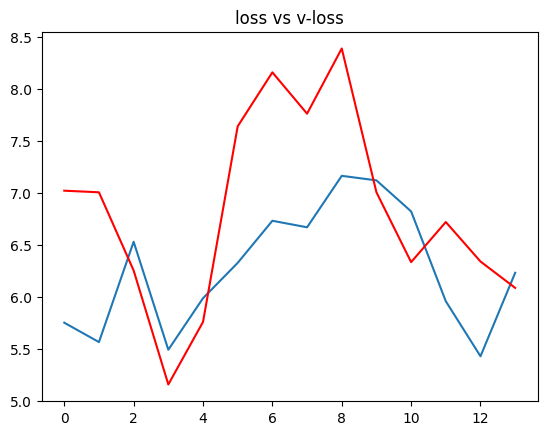

In [39]:
plt.plot(h['loss'])
plt.plot(h['val_loss'] , c = "red")
plt.title("loss vs v-loss")
plt.show()

In [40]:
# just to map o/p values 
op = dict(zip( train_data.class_indices.values(), train_data.class_indices.keys()))

In [41]:
from tensorflow.keras.preprocessing.image import load_img


1/1 [==============================] - 0s 486ms/step
 the image is of sad


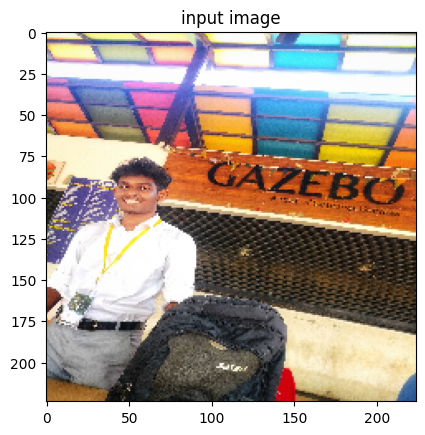

In [42]:
# path for the image to see if it predics correct class

path = "/content/IMG20230407085039-01.jpeg"
img = load_img(path, target_size=(224,224) )

i = img_to_array(img)/255
input_arr = np.array([i])
input_arr.shape

pred = np.argmax(model.predict(input_arr))

print(f" the image is of {op[pred]}")

# to display the image  
plt.imshow(input_arr[0])
plt.title("input image")
plt.show()